In [1]:
%matplotlib inline
from scribe_classifier.data.scribe import DataFramePickler, DbHandler
from sklearn.linear_model import SGDClassifier
from scribe_classifier.data.canada import AllCodes, TitleSet, SimpleModel, MultiStepModel
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size

In [2]:
df = DataFramePickler.load_from_pickle('./SavedScribeQueries/midsize_tech_usa.P')

In [3]:
target_level = 1
mdl = SimpleModel.load_from_pickle('./source_data/pickles/canada/trained_models/simple.lvl%d.P' % target_level, is_path=True)

In [4]:
# print(df.columns)
# df=df.drop(['email', 'firstName', 'lastName', 'emailError', 'emailvalidity'], axis=1)
titles = df['title'].tolist()
titles = ['' if v is None else v for v in titles]
# titles

In [5]:
vect = mdl.vect
clf = mdl.clf.best_estimator_
bow = vect.transform(titles)

In [ ]:
# import some data to play with
# reducer = TruncatedSVD(n_components=3, n_iter=200)
# decomp = reducer.fit_transform(bow)
pre_reducer = TruncatedSVD(n_components=50, n_iter=200)
reduced = pre_reducer.fit_transform(bow)

In [ ]:
reducer = TSNE(n_components=3, angle=0.81, verbose=3)
decomp = reducer.fit_transform(reduced)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 474137 samples in 15.619s...


In [6]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_class_bag_of_words_3d(decomp: 'np.ndarray', mdl: 'SimpleModel', angle1=30, angle2=30):
    # we only take the first two features. We could
    # avoid this ugly slicing by using a two-dim dataset
    X = decomp
    y = clf.predict(bow)
    cmap = get_cmap(12)
    # shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    # standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    classes = clf.classes_
    h = .02  # step size in the mesh
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
#     plt.axis('tight')

    # Plot also the training points
    i = 0
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(angle1, angle2)
    for label in clf.classes_:
        
        idx = np.where(y == label)
#         print(i," ", idx)
        ax.scatter(xs=X[idx, 0], ys= X[idx, 1], zs=X[idx, 2], c=cmap(i), label=classes[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=20)
        i += 1
    plt.title("Classified Titles on Reduced Diemsionality Bag of Words")
    plt.axis('tight')

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_


    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)


#     for i, color in zip(clf.classes_, colors):
#         plot_hyperplane(i, color)
    
    plt.legend()
    plt.show()
    return ax

In [7]:
def plot_class_bag_of_words(decomp: 'np.ndarray', mdl: 'SimpleModel', dim1=0, dim2=1):
    # we only take the first two features. We could
    # avoid this ugly slicing by using a two-dim dataset
    X = decomp
    y = clf.predict(bow)
    cmap = get_cmap(12)
    # shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    # standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    classes = clf.classes_
    h = .02  # step size in the mesh
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
#     plt.axis('tight')

    # Plot also the training points
    i = 0
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
    for label in clf.classes_:
        
        idx = np.where(y == label)
#         print(i," ", idx)
        plt.scatter(X[idx, dim1], X[idx, dim2], c=cmap(i), label=classes[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=20)
        i += 1
    plt.title("Classified Titles on Reduced Diemsionality Bag of Words")
    plt.axis('tight')

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_


    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)


#     for i, color in zip(clf.classes_, colors):
#         plot_hyperplane(i, color)
    plt.legend()
    plt.show()

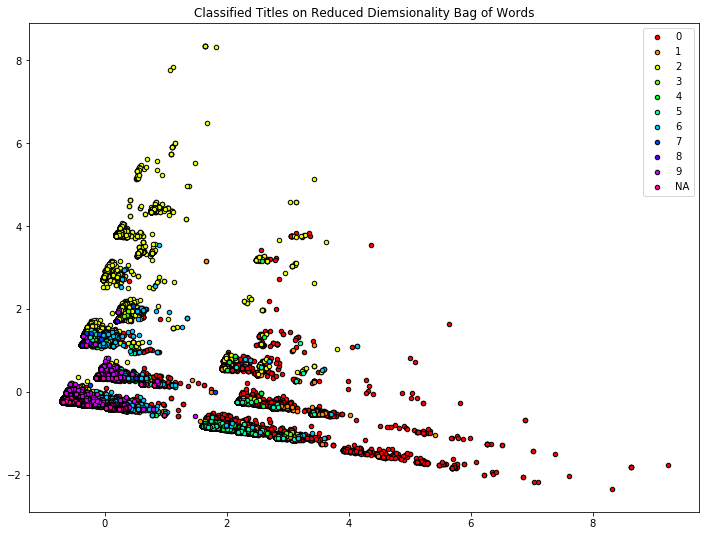

In [8]:
plot_class_bag_of_words(decomp, mdl, 0, 1)

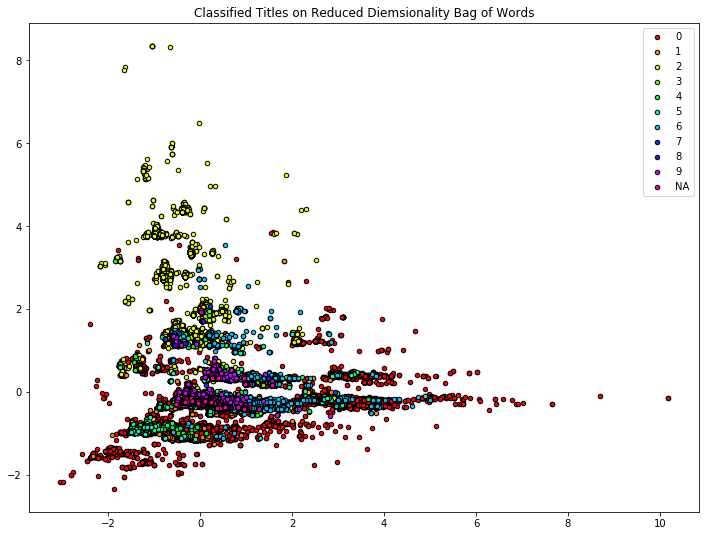

In [9]:
plot_class_bag_of_words(decomp, mdl, 2, 1)

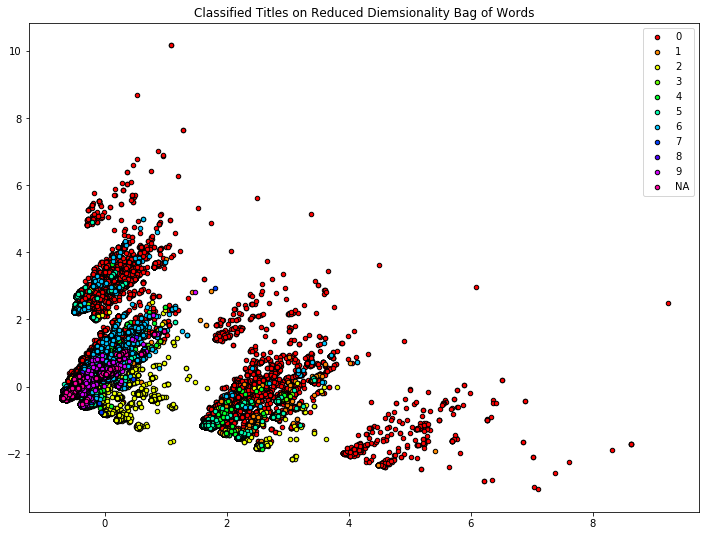

In [10]:
plot_class_bag_of_words(decomp, mdl, 0, 2)

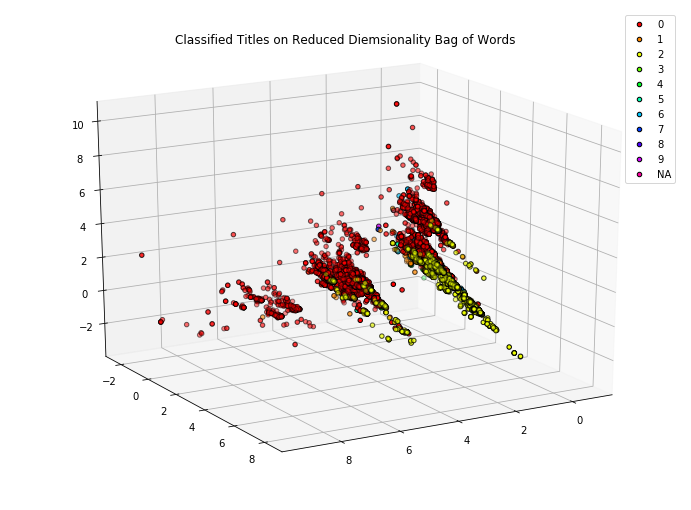

In [11]:
ax = plot_class_bag_of_words_3d(decomp, mdl, angle1=20, angle2=60)

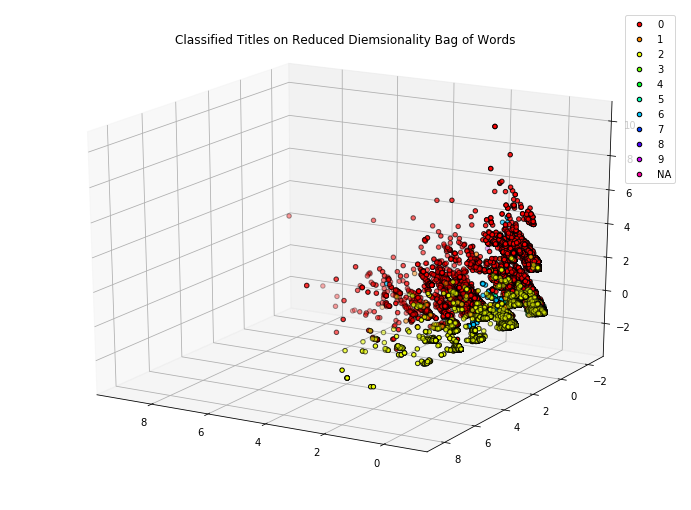

In [12]:
ax = plot_class_bag_of_words_3d(decomp, mdl, angle1=20, angle2=120)

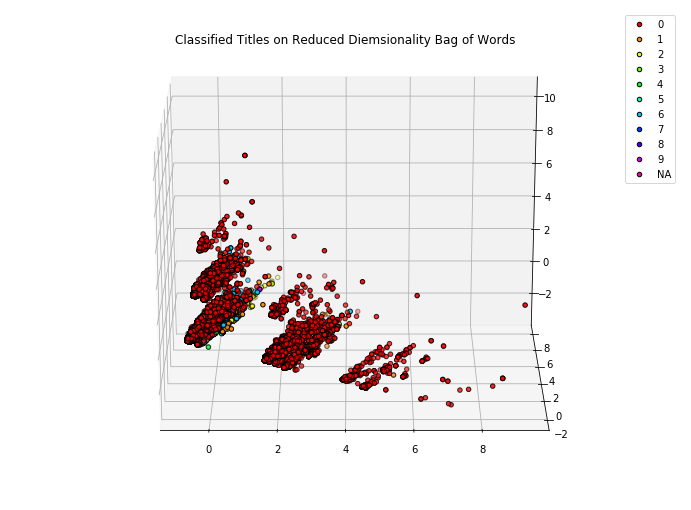

In [13]:
ax = plot_class_bag_of_words_3d(decomp, mdl, angle1=20, angle2=270)

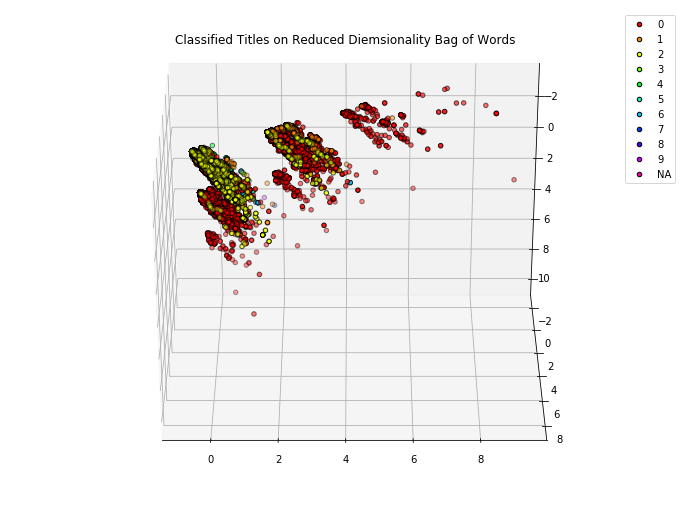

In [14]:
ax = plot_class_bag_of_words_3d(decomp, mdl, angle1=210, angle2=270)